In [1]:
import numpy as np
import pandas as pd
import sys
import os
import importlib

sys.path.append(os.path.abspath("../base"))
import classify
import features
pd.set_option("display.max_columns", None)

In [129]:
importlib.reload(classify)  # Reload the classify module
importlib.reload(features)

<module 'features' from '/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/features.py'>

In [120]:
categories, consumer, acct, transactions = features.get_datasets()
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer)

In [121]:
all_features = features.get_categorical_features2(
    all_features, transaction_categories, acct
)

In [124]:
all_features.to_csv('../../data_q2/features.csv')

In [125]:
all_features = pd.read_csv("../../data_q2/features.csv")


Logistic Regression Results
ROC-AUC: 0.757 | Accuracy: 0.767
Training Time: 1.9s | Predicting Time: 0.000006s
              precision    recall  f1-score   support

         0.0       0.96      0.78      0.86      2416
         1.0       0.18      0.63      0.28       186

    accuracy                           0.77      2602
   macro avg       0.57      0.70      0.57      2602
weighted avg       0.91      0.77      0.82      2602



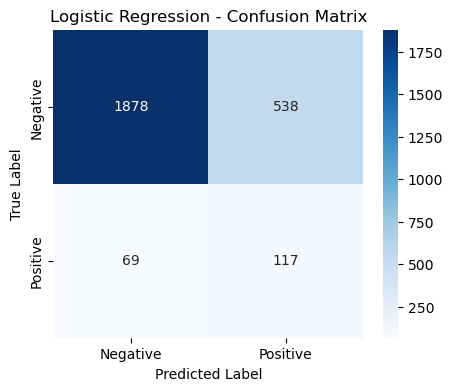


Random Forest Results
ROC-AUC: 0.846 | Accuracy: 0.926
Training Time: 18.8s | Predicting Time: 0.000035s
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2416
         1.0       0.45      0.18      0.26       186

    accuracy                           0.93      2602
   macro avg       0.70      0.58      0.61      2602
weighted avg       0.91      0.93      0.91      2602



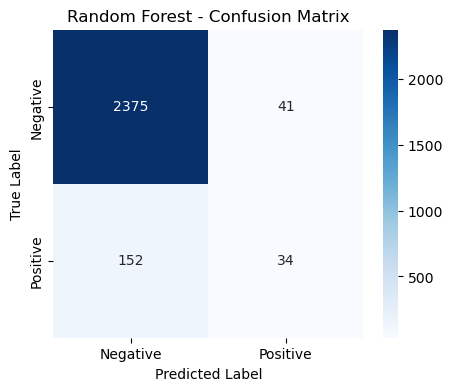


LightGBM Results
ROC-AUC: 0.862 | Accuracy: 0.920
Training Time: 2.8s | Predicting Time: 0.000013s
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2416
         1.0       0.39      0.20      0.26       186

    accuracy                           0.92      2602
   macro avg       0.66      0.59      0.61      2602
weighted avg       0.90      0.92      0.91      2602



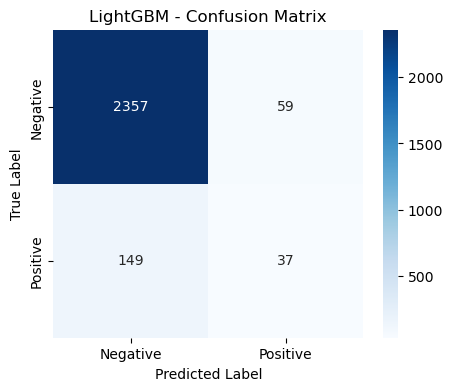


Balanced RF Results
ROC-AUC: 0.832 | Accuracy: 0.925
Training Time: 27.7s | Predicting Time: 0.000037s
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2416
         1.0       0.44      0.17      0.25       186

    accuracy                           0.93      2602
   macro avg       0.69      0.58      0.60      2602
weighted avg       0.90      0.93      0.91      2602



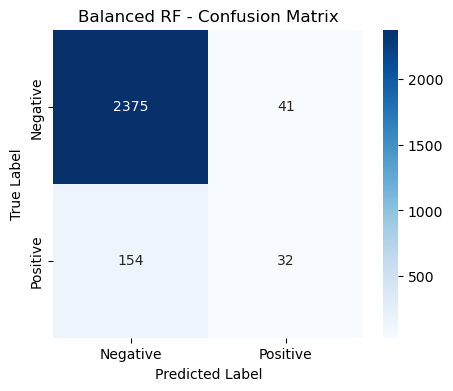


XGBoost Results
ROC-AUC: 0.851 | Accuracy: 0.912
Training Time: 4.0s | Predicting Time: 0.000007s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.31      0.18      0.23       186

    accuracy                           0.91      2602
   macro avg       0.62      0.58      0.59      2602
weighted avg       0.89      0.91      0.90      2602



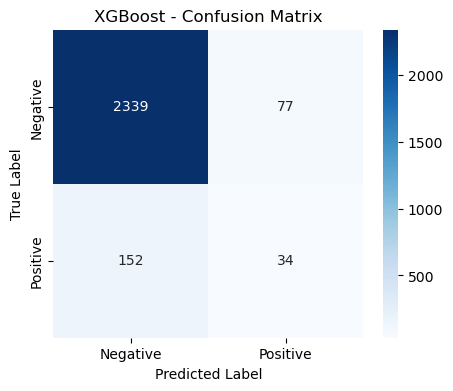


CatBoost Results
ROC-AUC: 0.854 | Accuracy: 0.922
Training Time: 32.9s | Predicting Time: 0.000009s
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2416
         1.0       0.41      0.20      0.27       186

    accuracy                           0.92      2602
   macro avg       0.68      0.59      0.62      2602
weighted avg       0.90      0.92      0.91      2602



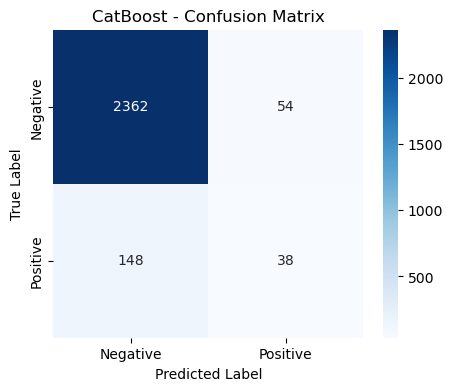


HistGB Results
ROC-AUC: 0.852 | Accuracy: 0.918
Training Time: 5.9s | Predicting Time: 0.000011s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      2416
         1.0       0.35      0.18      0.24       186

    accuracy                           0.92      2602
   macro avg       0.65      0.58      0.60      2602
weighted avg       0.90      0.92      0.91      2602



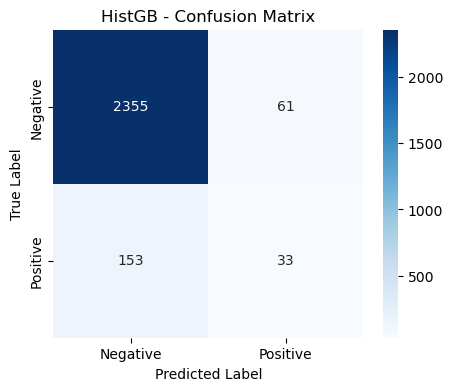


RUSBoost Results
ROC-AUC: 0.814 | Accuracy: 0.820
Training Time: 21.1s | Predicting Time: 0.000028s
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90      2416
         1.0       0.22      0.58      0.32       186

    accuracy                           0.82      2602
   macro avg       0.59      0.71      0.61      2602
weighted avg       0.91      0.82      0.85      2602



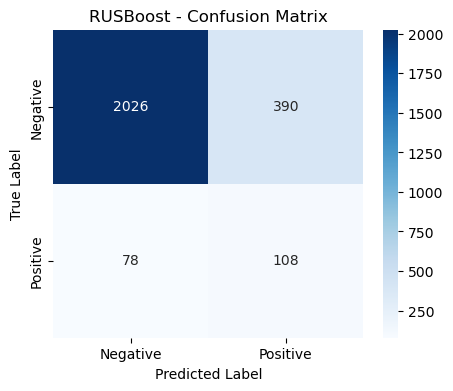


======================================== FINAL RESULTS ========================================
              model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
           LightGBM 0.861771  0.920061   0.900860 0.920061  0.908036    2.775095      0.000013
           CatBoost 0.853607  0.922367   0.903293 0.922367  0.909983   32.907170      0.000009
             HistGB 0.852332  0.917756   0.896968 0.917756  0.905012    5.860353      0.000011
            XGBoost 0.850930  0.911991   0.893755 0.911991  0.901551    4.023601      0.000007
      Random Forest 0.846094  0.925826   0.905072 0.925826  0.910887   18.788979      0.000035
        Balanced RF 0.831665  0.925058   0.903311 0.925058  0.909565   27.746220      0.000037
           RUSBoost 0.814383  0.820138   0.909597 0.820138  0.854952   21.085938      0.000028
Logistic Regression 0.756556  0.766718   0.908380 0.766718  0.819227    1.921959      0.000006


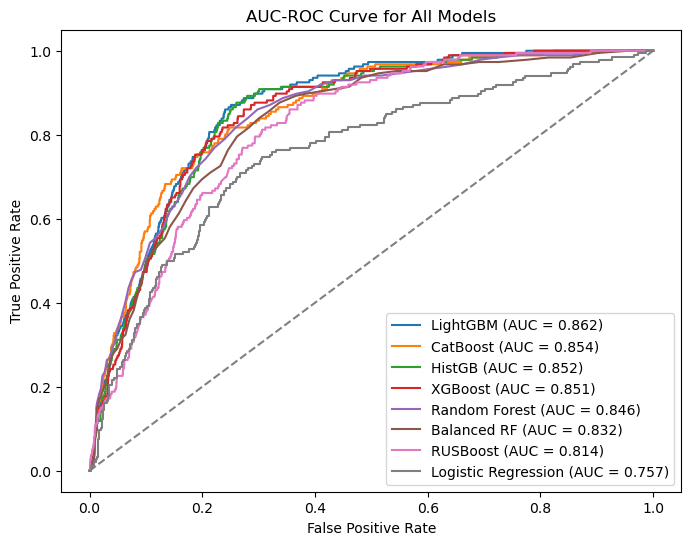

In [130]:
classification_features = (all_features.drop(columns = ['evaluation_date', 'DQ_TARGET'])).columns
classify.run_classification(classification_features, "DQ_TARGET", all_features)

In [13]:
classification_features = (
    all_features.drop(columns=["prism_consumer_id", "evaluation_date", "DQ_TARGET"])
).columns
best_features = classify.get_best_features(classification_features, 'DQ_TARGET', all_features, n_features = 100)


Top Features (RandomForestClassifier):
                           Feature  Importance  Correlation
                      credit_score    0.071951    -0.249976
              account_type_SAVINGS    0.036733    -0.099071
                           balance    0.033870    -0.030563
                ACCOUNT_FEES_count    0.019624     0.020680
                  ACCOUNT_FEES_std    0.019338    -0.000036
               ACCOUNT_FEES_median    0.018523     0.001497
                  OVERDRAFT_median    0.017208     0.000407
                   OVERDRAFT_count    0.016646     0.066101
                     OVERDRAFT_std    0.013310     0.014445
                 SELF_TRANSFER_iqr    0.012234    -0.026766
                       BNPL_median    0.011610     0.011102
                       LOAN_median    0.011126     0.002615
                          LOAN_std    0.010011    -0.008751
                          BNPL_iqr    0.008668     0.009787
                        LOAN_count    0.008330     0.042468


In [11]:
pd.DataFrame(best_features[0]).T

,credit_score,balance,account_type_SAVINGS,ACCOUNT_FEES_count,ACCOUNT_FEES_median,OVERDRAFT_count,BNPL_count,BNPL_median,OVERDRAFT_median,ACCOUNT_FEES_std,SELF_TRANSFER_iqr,LOAN_median,BNPL_iqr,LOAN_count,OVERDRAFT_std,SELF_TRANSFER_count,BNPL_std,LOAN_std,BNPL_coef_variation,MISCELLANEOUS_median,ACCOUNT_FEES_coef_variation,INVESTMENT_INCOME_count,GENERAL_MERCHANDISE_count,ESSENTIAL_SERVICES_count,MISCELLANEOUS_count,ENTERTAINMENT_skewness,INSURANCE_count,ENTERTAINMENT_count,BNPL_skewness,DEPOSIT_median,AUTOMOTIVE_median,ESSENTIAL_SERVICES_std,ATM_CASH_coef_variation,account_type_CHECKING,ATM_CASH_median,GROCERIES_count,ATM_CASH_iqr,ATM_CASH_count,AUTOMOTIVE_skewness,MISCELLANEOUS_skewness,PAYCHECK_median,DEPOSIT_count,EXTERNAL_TRANSFER_skewness,ENTERTAINMENT_coef_variation,CREDIT_CARD_PAYMENT_coef_variation,ACCOUNT_FEES_mean,BNPL_mean,INVESTMENT_INCOME_std,REFUND_count,ESSENTIAL_SERVICES_median,LOAN_iqr,PAYCHECK_count,CREDIT_CARD_PAYMENT_count,FOOD_AND_BEVERAGES_count,EXTERNAL_TRANSFER_count,INVESTMENT_INCOME_median,ATM_CASH_std,HEALTHCARE_MEDICAL_count,CREDIT_CARD_PAYMENT_skewness,DEPOSIT_std,ACCOUNT_FEES_iqr,SELF_TRANSFER_std,GROCERIES_std,DEPOSIT_mean,AUTOMOTIVE_iqr,ESSENTIAL_SERVICES_skewness,MISCELLANEOUS_coef_variation,HOME_IMPROVEMENT_count,GROCERIES_median,EXTERNAL_TRANSFER_median,DEPOSIT_skewness,INSURANCE_median,ESSENTIAL_SERVICES_coef_variation,DEPOSIT_iqr,MISCELLANEOUS_std,ENTERTAINMENT_median,TRAVEL_count,TRANSPORATION_skewness,EXTERNAL_TRANSFER_iqr,GROCERIES_coef_variation,FOOD_AND_BEVERAGES_iqr,MISCELLANEOUS_iqr,FOOD_AND_BEVERAGES_skewness,PAYCHECK_std,REFUND_median,HEALTHCARE_MEDICAL_coef_variation,ENTERTAINMENT_mean,CREDIT_CARD_PAYMENT_median,GENERAL_MERCHANDISE_skewness,ACCOUNT_FEES_skewness,FOOD_AND_BEVERAGES_median,AUTO_LOAN_count,GROCERIES_skewness,TRANSPORATION_coef_variation,EXTERNAL_TRANSFER_coef_variation,LOAN_mean,EXTERNAL_TRANSFER_std,MISCELLANEOUS_mean,AUTOMOTIVE_std,REFUND_skewness
Feature,credit_score,balance,account_type_SAVINGS,ACCOUNT_FEES_count,ACCOUNT_FEES_median,OVERDRAFT_count,BNPL_count,BNPL_median,OVERDRAFT_median,ACCOUNT_FEES_std,SELF_TRANSFER_iqr,LOAN_median,BNPL_iqr,LOAN_count,OVERDRAFT_std,SELF_TRANSFER_count,BNPL_std,LOAN_std,BNPL_coef_variation,MISCELLANEOUS_median,ACCOUNT_FEES_coef_variation,INVESTMENT_INCOME_count,GENERAL_MERCHANDISE_count,ESSENTIAL_SERVICES_count,MISCELLANEOUS_count,ENTERTAINMENT_skewness,INSURANCE_count,ENTERTAINMENT_count,BNPL_skewness,DEPOSIT_median,AUTOMOTIVE_median,ESSENTIAL_SERVICES_std,ATM_CASH_coef_variation,account_type_CHECKING,ATM_CASH_median,GROCERIES_count,ATM_CASH_iqr,ATM_CASH_count,AUTOMOTIVE_skewness,MISCELLANEOUS_skewness,PAYCHECK_median,DEPOSIT_count,EXTERNAL_TRANSFER_skewness,ENTERTAINMENT_coef_variation,CREDIT_CARD_PAYMENT_coef_variation,ACCOUNT_FEES_mean,BNPL_mean,INVESTMENT_INCOME_std,REFUND_count,ESSENTIAL_SERVICES_median,LOAN_iqr,PAYCHECK_count,CREDIT_CARD_PAYMENT_count,FOOD_AND_BEVERAGES_count,EXTERNAL_TRANSFER_count,INVESTMENT_INCOME_median,ATM_CASH_std,HEALTHCARE_MEDICAL_count,CREDIT_CARD_PAYMENT_skewness,DEPOSIT_std,ACCOUNT_FEES_iqr,SELF_TRANSFER_std,GROCERIES_std,DEPOSIT_mean,AUTOMOTIVE_iqr,ESSENTIAL_SERVICES_skewness,MISCELLANEOUS_coef_variation,HOME_IMPROVEMENT_count,GROCERIES_median,EXTERNAL_TRANSFER_median,DEPOSIT_skewness,INSURANCE_median,ESSENTIAL_SERVICES_coef_variation,DEPOSIT_iqr,MISCELLANEOUS_std,ENTERTAINMENT_median,TRAVEL_count,TRANSPORATION_skewness,EXTERNAL_TRANSFER_iqr,GROCERIES_coef_variation,FOOD_AND_BEVERAGES_iqr,MISCELLANEOUS_iqr,FOOD_AND_BEVERAGES_skewness,PAYCHECK_std,REFUND_median,HEALTHCARE_MEDICAL_coef_variation,ENTERTAINMENT_mean,CREDIT_CARD_PAYMENT_median,GENERAL_MERCHANDISE_skewness,ACCOUNT_FEES_skewness,FOOD_AND_BEVERAGES_median,AUTO_LOAN_count,GROCERIES_skewness,TRANSPORATION_coef_variation,EXTERNAL_TRANSFER_coef_variation,LOAN_mean,EXTERNAL_TRANSFER_std,MISCELLANEOUS_mean,AUTOMOTIVE_std,REFUND_skewness



Logistic Regression Results
ROC-AUC: 0.778 | Accuracy: 0.742
Training Time: 0.4s
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84      2416
         1.0       0.18      0.71      0.28       186

    accuracy                           0.74      2602
   macro avg       0.57      0.73      0.56      2602
weighted avg       0.91      0.74      0.80      2602


Random Forest Results
ROC-AUC: 0.789 | Accuracy: 0.911
Training Time: 16.2s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.26      0.13      0.18       186

    accuracy                           0.91      2602
   macro avg       0.60      0.55      0.57      2602
weighted avg       0.89      0.91      0.90      2602

[LightGBM] [Info] Number of positive: 9624, number of negative: 9624
[LightGBM] [Info] Total Bins 25011
[LightGBM] [Info] Number of data points in the train set: 19248, number of used fea

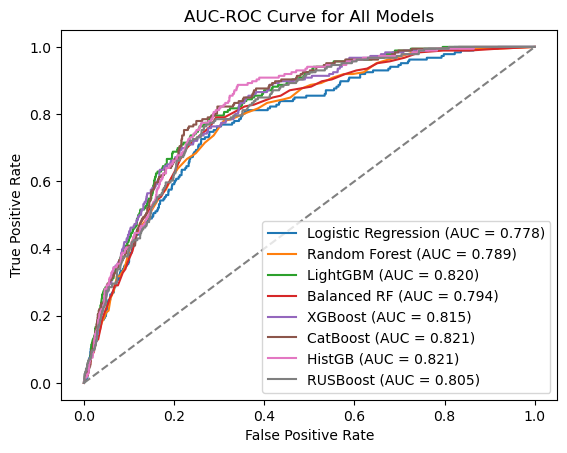

In [23]:
classify.run_classification(best_features[0], "DQ_TARGET", all_features)



Logistic Regression Results
ROC-AUC: 0.777 | Accuracy: 0.726
Training Time: 0.1s
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83      2416
         1.0       0.17      0.70      0.27       186

    accuracy                           0.73      2602
   macro avg       0.57      0.72      0.55      2602
weighted avg       0.91      0.73      0.79      2602


Random Forest Results
ROC-AUC: 0.799 | Accuracy: 0.908
Training Time: 6.6s
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      2416
         1.0       0.23      0.12      0.16       186

    accuracy                           0.91      2602
   macro avg       0.58      0.55      0.56      2602
weighted avg       0.88      0.91      0.89      2602

[LightGBM] [Info] Number of positive: 9561, number of negative: 9561
[LightGBM] [Info] Total Bins 11635
[LightGBM] [Info] Number of data points in the train set: 19122, number of used feat

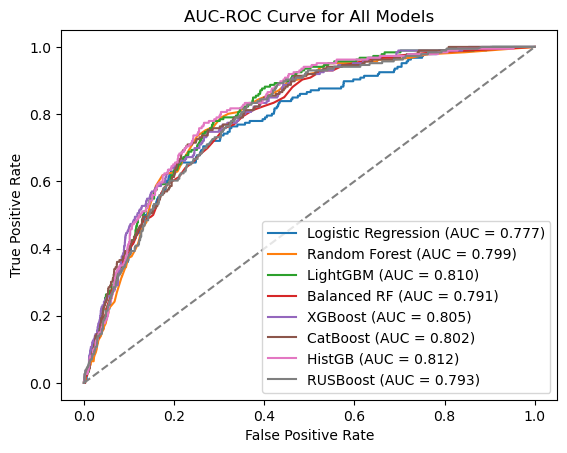

In [67]:
classify.run_classification(best_features[2], "DQ_TARGET", all_features)
